<a href="https://colab.research.google.com/github/marciusdm/dsnp/blob/main/main/projeto2/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus (SARS-CoV-2).

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas. Também é possível se infectar tocando em uma superfície contaminada e a seguir passar as mãos nos olhos, nariz ou boca.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que a maioria dos casos confirmados são assintomáticos e rápidos, e as pessoas que se encaixam nesse grupo, geralmente, se recuperam sem nenhuma sequela.

No entanto, algumas pessoas terão infecções graves e precisarão de oxigênio e parte destas, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

Os dados aqui apresentados se originam do portal [Our World in Data](https://github.com/owid/covid-19-data/tree/master/public/data) e cada linha corresponde a um registro diário de casos, mortes, vacinados e outras informações. Este registro pode ser de um país, ou de um agrupamento de países, que pode ser dos seguinte tipos:  
* Continente;
* Região geográfica, ex: União Europeia;
* Alta renda, média renda e baixa renda;
* O mundo inteiro

### Dicionário de Variáveis
**iso_code**: quando o registro é de um país isoladamente, trata-se de seu código de 3 letras, definido pela norma ISO 3166-1 alpha-3. Quando é um agrupamento também é um código de 3 letras prefixado por "OWID_". Também são prefixados por OWID_ os campos correspondentes aos 4 países constituintes do Reino Unido (Inglaterra, Escócia, País de Gales e Irlanda do Norte). Exemplos de valores para esta coluna: (BRA: Brasil, DEU: Alemanha, OWID_AFR: África, OWID_WRL: Mundo, OWID_HIC: Países de alta renda.  
**continent**:  continente no qual o país se localiza. Quando se trata de agrupamento, esta coluna vem em branco.  
**location**: nome do país ou agrupamento (em inglês)  
**date**: data do registro  
**total_cases**: total de casos   
**new_cases**: novos casos no dia   
**new_cases_smoothed**: média móvel de 7 dias de casos  
**total_deaths**: total de mortes   
**new_deaths**: novas mortes  
**new_deaths_smoothed**: média móvel de 7 dias de mortes  
**total_cases_per_million**: total de casos por milhão de pessoas  
**new_cases_per_million**:  Novos casos por milhão  
**new_cases_smoothed_per_million**: média móvel de casos por milhão  
**total_deaths_per_million**: total de mortes por milhão  
**new_deaths_per_million**: novas mortes por milhão  
**new_deaths_smoothed_per_million**: média móvel de novas mortes por milhão  
**reproduction_rate**: estimativa em tempo real da taxa de reprodução da COVID-19 (veja este [link](https://github.com/crondonm/TrackingR/tree/main/Estimates-Database)).  
**icu_patients**: internações em UTI  
**icu_patients_per_million**: pacientes internados em UTI por milhão  
**hosp_patients**: internações hospitalares  
**hosp_patients_per_million**: internações hospitalares por milhão  
**weekly_icu_admissions**: número de novos pacientes admitidos em uma semana (na data corrente e nos 6 dias anteriores)  
**weekly_icu_admissions_per_million**: número de novas admissões em UTI em uma semana por milhão pessoas  
**weekly_hosp_admissions**: número de novas internações hospitalares no período de uma semana  
**weekly_hosp_admissions_per_million**: número de novas internações hospitalares no período de uma semana  
**total_tests**: total de testes de COVID-19 realizados  
**new_tests**: número de novos testes no dia (calculado somente para dias consecutivos)  
**total_tests_per_thousand**: total de testes por mil pessoas  
**new_tests_per_thousand**: novos testes por 1000 pessoas  
**new_tests_smoothed**: média móvel de 7 dias de testes realizados  
**new_tests_smoothed_per_thousand**: média móvel de 7 dias de testes realizados por 1009 pessoas  
**positive_rate**: proporção de testes que dão resultado positivo, em uma média móvel de 7 dias. É o inverso da coluna abaixo  
**tests_per_case**: total de testes por caso positivo em uma média móvel de 7 dias. É o inverso da colunan **positive_rate** acima  
**tests_units**: coluna categórica que indica a metodologia de teste utilizada por cada país Pode ter os seguintes valores: *people tested* (pessoas testadas), *tests performed* (testes efetuados, uma pessoa pode ser testada mais de uma vez) ou *samples tested* (amostras testadas, em alguns casos mais de uma amostra pode ser necessária para efetuar um teste)    
**total_vaccinations**: Total de vacinas aplicadas  
**people_vaccinated**: Total de pessoas vacinadas  
**people_fully_vaccinated**: Total de pessoas que tomaram todas as doses previstas pelo protocolo de vacinação de cada país   
**total_boosters**: Total de doses de reforço (doses aplicadas além do previsto pelo protocolo de vacinação de cada país)  
**new_vaccinations**: novas vacinas aplicadas no dia  
**new_vaccinations_smoothed**: média móvel de 7 dias de novas vacinas  
**total_vaccinations_per_hundred**: total de vacinas aplicadas por 100 pessoas  
**people_vaccinated_per_hundred**: total de indivíduos vacinados por 100 pessoas  
**people_fully_vaccinated_per_hundred**: total de pessoas totalmente vacinadas por 100  
**total_boosters_per_hundred**: doses de reforço por 100 pessoas  
**new_vaccinations_smoothed_per_million**: média móvel de 7 dias de novas vacinas aplicadas por milhão  
**new_people_vaccinated_smoothed**: média móvel de 7 dias de novos indivíduos vacinados  
**new_people_vaccinated_smoothed_per_hundred**: média móvel de 7 dias de novos indivíduos vacinados por 100  
**stringency_index**: Índice, composto de 9 variáveis que denota o grau de restrição imposto pelos governos frente à pandemia. É um valor que varia de 0 a 100 (restrições mais rígidas)  
**population_density**: densidade populacional do local, ou seja, total de pessoas divididas pela área   
**median_age**: mediana da idade da população usando uma projeção da ONU de 2020  
**aged_65_older**: proporção de indivíduos com 65 anos ou mais no ano mais recente disponível   
**aged_70_older**: proporção de indivíduos com 70 anos ou mais no ano de 2015  
**gdp_per_capita**: PIB per capita utilizando o método da [Paridade do Poder de Compra](https://pt.wikipedia.org/wiki/Paridade_do_poder_de_compra) (PPC)   
**extreme_poverty**: proporção de pessoas vivendo em condição de extrema pobreza  
**cardiovasc_death_rate**: taxa de morte por doenças cardiovasculares em 2017 (total de mortes por 100000 pessoas)  
**diabetes_prevalence**: prevalência de diabetes em porcentagem de pessoas entre 20 e 79 anos  
**female_smokers**: proporção de mulheres fumantes na população  
**male_smokers**:  proporção de homens fumantes na população  
**handwashing_facilities**: proporção de pessoas com acesso a instalações adequadas para lavagem de mãos  
**hospital_beds_per_thousand**: letos de hospital por 1000 habitantes  
**life_expectancy**: expectativa de vida ao nascer em 2019  
**human_development_index**: Índice de Desenvolvimento Humano (IDH). Índice estatístico composto por três variáveis: renda, escolaridade e expectativa de vida.   
**population**: população total da localidade   
**excess_mortality_cumulative_absolute**: diferença porcentual entre o número de mortes desde 1º de janeiro de 2020 e a projeção do total de mortes para o mesmo período em anos anteriores   
**excess_mortality_cumulative**: diferença porcentual entre o acumulado de mortes desde 1º de janeiro de 2020 e a projeção do acumulado de mortes para o mesmo período em anos anteriores  
**excess_mortality**: diferença porcentual entre mortes semanais ou mensais reportadas em 2020-21 e o número projetado de mortes para o mesmo período em anos anteriores  
**excess_mortality_cumulative_per_million**: diferença porcentual entre o número de mortes desde 1º de janeiro de 2020 e a projeção do total de mortes para o mesmo período em anos anteriores por milhão de pessoas 

### Importando os dados do COVID-19


In [ ]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

## Análise Exploratória dos Dados

Nesta etapa iremos verificar o tamanho do dataframe, os nomes das colunas e os seus tipos, bem como descobrir a proporção de dados ausentes.


In [ ]:
# verificando as dimensões
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])
#Visualizar as 5 primeiras entradas*
df.head(10)

Dimensões do Dataset 
Variáveis:  67 
Entradas:  252046


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
# extrair os nomes das colunas
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
#necessário rodar este comando p/ não truncar a saída gerada pelo comando df.dtypes
pd.set_option("display.max_rows", 100)

#Quais os tipos das variáveis*
df.dtypes

iso_code                                       object
continent                                      object
location                                       object
date                                           object
total_cases                                   float64
new_cases                                     float64
new_cases_smoothed                            float64
total_deaths                                  float64
new_deaths                                    float64
new_deaths_smoothed                           float64
total_cases_per_million                       float64
new_cases_per_million                         float64
new_cases_smoothed_per_million                float64
total_deaths_per_million                      float64
new_deaths_per_million                        float64
new_deaths_smoothed_per_million               float64
reproduction_rate                             float64
icu_patients                                  float64
icu_patients_per_million    

In [ ]:
#Verificando a quantidade de dados ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

excess_mortality_cumulative_per_million       0.966651
excess_mortality_cumulative                   0.966651
excess_mortality_cumulative_absolute          0.966651
excess_mortality                              0.966496
weekly_icu_admissions                         0.966269
weekly_icu_admissions_per_million             0.966269
weekly_hosp_admissions                        0.919843
weekly_hosp_admissions_per_million            0.919843
icu_patients                                  0.865638
icu_patients_per_million                      0.865638
hosp_patients_per_million                     0.853686
hosp_patients                                 0.853686
total_boosters                                0.841488
total_boosters_per_hundred                    0.841488
new_vaccinations                              0.765949
people_fully_vaccinated                       0.740669
people_fully_vaccinated_per_hundred           0.740669
people_vaccinated_per_hundred                 0.730078
people_vac

Chama a atenção a quantidade de registros nulos referentes a excesso de mortalidade, de testes realizados e de informações referentes a internações hospitalares. Ao que indica, poucos países disponibilizam estas informações.  
O número alto de registros nulos referentes às vacinações se deve ao fato de que as vacinas só começaram a ser disponibilizadas cerca de um ano após o estouro da pandemia.

In [ ]:
#Antes de começar a explorar os dados, vamos converter a coluna 'date' p/ o formato datetime
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
#vamos ver se converteu
df.dtypes

iso_code                                              object
continent                                             object
location                                              object
date                                          datetime64[ns]
total_cases                                          float64
new_cases                                            float64
new_cases_smoothed                                   float64
total_deaths                                         float64
new_deaths                                           float64
new_deaths_smoothed                                  float64
total_cases_per_million                              float64
new_cases_per_million                                float64
new_cases_smoothed_per_million                       float64
total_deaths_per_million                             float64
new_deaths_per_million                               float64
new_deaths_smoothed_per_million                      float64
reproduction_rate       

Após a conversão da coluna 'date' p/ o formato Datetime vamos pegar a data mais recente e tentar extrair alguns *insights*

In [ ]:
df.date.max()


'2023-01-22'

### Verificando a situação atual da pandemia
Primeiramente vamos verificar o panorama atual no mundo inteiro


In [ ]:
#Os registros referentes a data mais recente costumam vir incompletos, por isso sempre pego o do dia anterior
current_date = '2023-01-20'
#antes disso vamos separar o dataframe atual em 2 dataframes, um contendo somente países e outro, os agrupamentos
df_cnt = df[df.iso_code.str.contains("OWID")== False]

df_grp = df[df.iso_code.str.contains("OWID")]


Text(0, 0.5, 'Novas mortes')

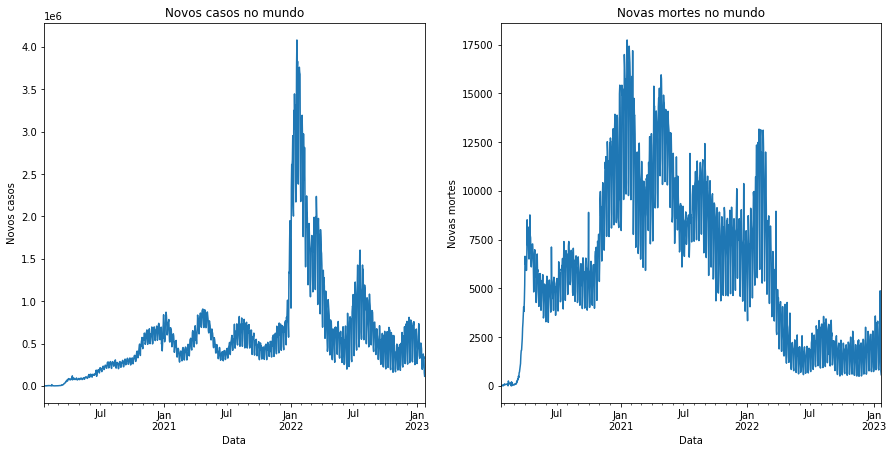

In [ ]:

#Plotando o gráfico de novaos casos e de novas mortes p/ o mundo inteiro
df_wrld = df_grp.loc[df.iso_code == "OWID_WRL",["date","new_cases","new_deaths"]].set_index("date")

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
df_wrld["new_cases"].plot(kind='line', ax = ax1)
ax1.set_title('Novos casos no mundo')
ax1.set_xlabel('Data')
ax1.set_ylabel('Novos casos')

df_wrld["new_deaths"].plot(kind='line', ax = ax2)
ax2.set_title('Novas mortes no mundo')
ax2.set_xlabel('Data')
ax2.set_ylabel('Novas mortes')


O pico do número de mortes ocorreu no primeiro semestre de 2021, quando a maioria dos países sofreu com uma segunda onda devastadora de coronavírus. Já o pico do número de casos ocorreu durante o início de 2022, na tereceira onda com a variante ômicron, que embora tivesse uma taxa de contágio bastante elevada, não causou tantas mortes, sendo considerada uma variante mais branda.  
Vamos verificar se alguma diferença significativa entre os países mais ricos e os mais pobres. O site *Our World in Data* divide os países em 4 grupos quanto à renda (alta, intermediária alta, intermediária baixa e baixa). Primeiramente vamos verificar as populações destes quatro grupos






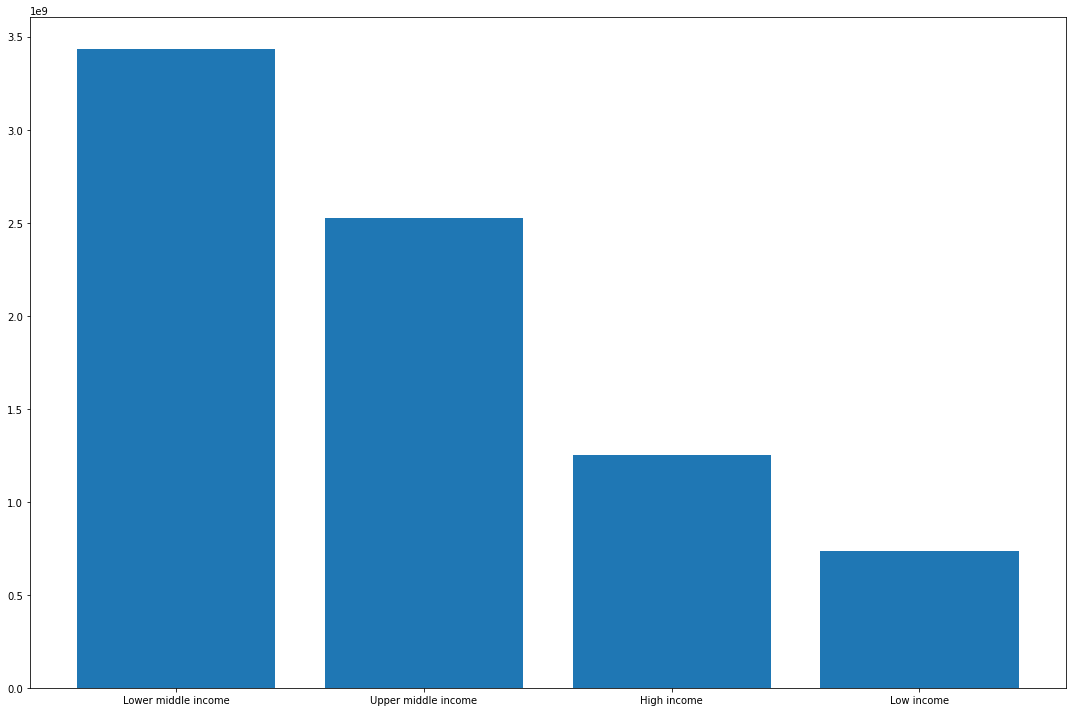

In [ ]:
population_by_income = df_grp[(df_grp.date == current_date) & (df_grp.location.str.contains("income"))].sort_values(by="population", ascending=False)
fig, ax = plt.subplots(figsize=(15,10))

ax.bar('location', 'population', data=population_by_income)

plt.tight_layout()


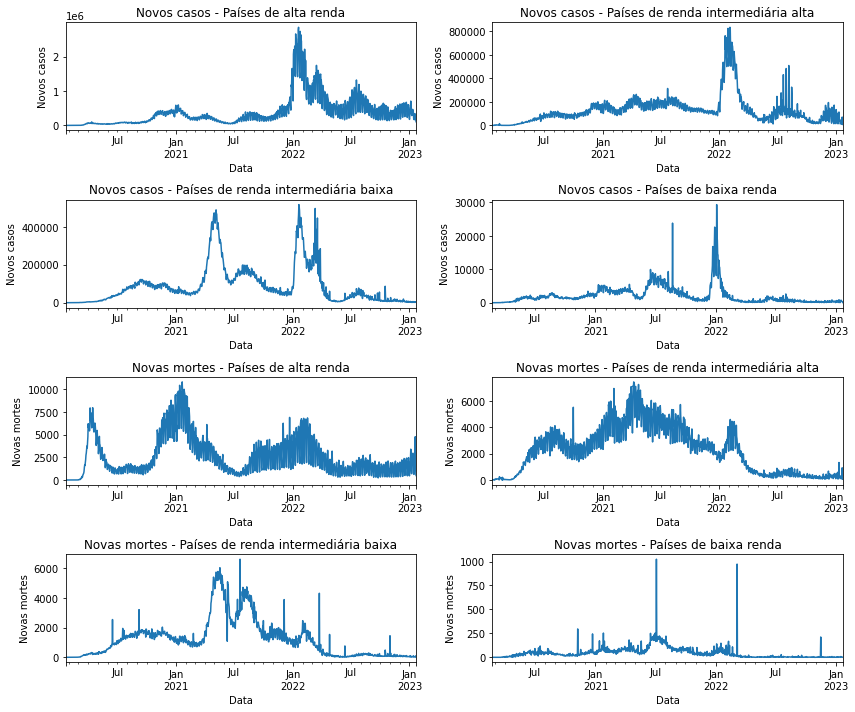

In [ ]:
fig,((ax1,ax2),(ax3,ax4), (ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
#Países com renda alta
hic_data = df_grp.loc[df_grp.iso_code=="OWID_HIC",["date","new_cases","new_deaths"]].set_index("date")
#Países com renda média alta
umc_data = df_grp.loc[df_grp.iso_code=="OWID_UMC",["date","new_cases","new_deaths"]].set_index("date")
#Países com renda média baixa
ulc_data = df_grp.loc[df_grp.iso_code=="OWID_LMC",["date","new_cases","new_deaths"]].set_index("date")
#Países com renda baixa
lic_data = df_grp.loc[df_grp.iso_code=="OWID_LIC",["date","new_cases","new_deaths"]].set_index("date")

hic_data["new_cases"].plot(kind='line', ax=ax1)
ax1.set_title('Novos casos - Países de alta renda')
ax1.set_xlabel('Data')
ax1.set_ylabel('Novos casos')

umc_data["new_cases"].plot(kind='line', ax=ax2)
ax2.set_title('Novos casos - Países de renda intermediária alta')
ax2.set_xlabel('Data')
ax2.set_ylabel('Novos casos')

ulc_data["new_cases"].plot(kind='line', ax=ax3)
ax3.set_title('Novos casos - Países de renda intermediária baixa')
ax3.set_xlabel('Data')
ax3.set_ylabel('Novos casos')

lic_data["new_cases"].plot(kind='line', ax=ax4)
ax4.set_title('Novos casos - Países de baixa renda')
ax4.set_xlabel('Data')
ax4.set_ylabel('Novos casos')

hic_data["new_deaths"].plot(kind='line', ax=ax5)
ax5.set_title('Novas mortes - Países de alta renda')
ax5.set_xlabel('Data')
ax5.set_ylabel('Novas mortes')

umc_data["new_deaths"].plot(kind='line', ax=ax6)
ax6.set_title('Novas mortes - Países de renda intermediária alta')
ax6.set_xlabel('Data')
ax6.set_ylabel('Novas mortes')

ulc_data["new_deaths"].plot(kind='line', ax=ax7)
ax7.set_title('Novas mortes - Países de renda intermediária baixa')
ax7.set_xlabel('Data')
ax7.set_ylabel('Novas mortes')

lic_data["new_deaths"].plot(kind='line', ax=ax8)
ax8.set_title('Novas mortes - Países de baixa renda')
ax8.set_xlabel('Data')
ax8.set_ylabel('Novas mortes')

plt.tight_layout()


Interessante notar que os países com renda mais baixa, ainda que sejam o grupo menos populoso, não foram tão afetados pela pandemia, quanto os países mais ricos. Este fato, particularmente na África subsaariana, que concentra a maior parte dos países de baixa renda do globo, tem intrigado os cientistas. Não se sabe seos casos e mortes estão subnotificados, ou  se é devido a alguma resistência natural das pessoas do local.  
Vamos examinar os países com o maior número de casos:


In [ ]:
#total de casos

df_cnt[df_cnt.date == current_date].sort_values(by="total_cases", ascending=False)[["iso_code","location","total_cases"]][0:10]

,iso_code,location,total_cases
237987,USA,United States,101998621.0
103598,IND,India,44683005.0
79862,FRA,France,39516793.0
85149,DEU,Germany,37668384.0
31730,BRA,Brazil,36712851.0
114268,JPN,Japan,31924066.0
211151,KOR,South Korea,29982905.0
112123,ITA,Italy,25415630.0
236890,GBR,United Kingdom,24259240.0
187015,RUS,Russia,21573690.0


Agora vamos analisar os países com maior número de óbitos:

In [ ]:
df_cnt[df_cnt.date == current_date].sort_values(by="total_deaths", ascending=False)[["iso_code","location","total_cases","total_deaths","total_deaths_per_million"]][0:10]

,iso_code,location,total_cases,total_deaths,total_deaths_per_million
237987,USA,United States,101998621.0,1104103.0,3263.778
31730,BRA,Brazil,36712851.0,696188.0,3233.369
103598,IND,India,44683005.0,530730.0,374.499
187015,RUS,Russia,21573690.0,386666.0,2671.945
145024,MEX,Mexico,7337100.0,331829.0,2602.496
179323,PER,Peru,4477955.0,218606.0,6420.225
236890,GBR,United Kingdom,24259240.0,216255.0,3203.354
112123,ITA,Italy,25415630.0,186488.0,3158.807
85149,DEU,Germany,37668384.0,164703.0,1975.571
79862,FRA,France,39516793.0,163821.0,2415.776


verificando os países com o maior número de novos casos e de novas mortes

In [ ]:
#os 10 países com o maior número de novos casos (média móvel)
df_cnt[df_cnt.date == current_date].sort_values(by="new_cases_smoothed", ascending=False)[["iso_code","location","new_cases","new_cases_smoothed"]][0:10]

,iso_code,location,new_cases,new_cases_smoothed
114268,JPN,Japan,82614.0,103663.286
237987,USA,United States,39347.0,49883.000
211151,KOR,South Korea,27539.0,29797.714
220734,TWN,Taiwan,18203.0,19269.429
31730,BRA,Brazil,35007.0,13211.429
85149,DEU,Germany,8866.0,9035.571
112123,ITA,Italy,51888.0,7412.571
187015,RUS,Russia,6031.0,5051.000
79862,FRA,France,4475.0,4938.857
100393,HKG,Hong Kong,3789.0,4871.857


In [ ]:
#os 10 países com o maior número de novos óbitos (média móvel)
df_cnt[df_cnt.date == current_date].sort_values(by="new_deaths_smoothed", ascending=False)[["iso_code","location","new_deaths","new_deaths_smoothed"]][0:10]

,iso_code,location,new_deaths,new_deaths_smoothed
237987,USA,United States,422.0,576.857
114268,JPN,Japan,425.0,412.000
85149,DEU,Germany,118.0,132.571
31730,BRA,Brazil,573.0,124.429
112123,ITA,Italy,495.0,70.714
213261,ESP,Spain,424.0,60.571
79862,FRA,France,44.0,57.857
13874,AUS,Australia,69.0,54.286
100393,HKG,Hong Kong,42.0,51.286
145024,MEX,Mexico,224.0,45.571


Atualmente, os países que lideram o ranking do total de mortes são:
* Estados Unidos
* Brasil
* Índia
* Rússia
* México  

E atualmente os países com o de novas mortes são:
* Estados Unidos
* Japão
* Alemanha
* Brasil
* Itália

Vale a pena ressaltar que a relação de casos x mortes, após a segunda onda de coronavírus, indica que as infecções têm ficado mais brandas. Porém chama a atenção o número alto de mortes no Japão.  
Vamos plotar um gráfico de barras com os países atualmente mais afetados pela pandemia:




 

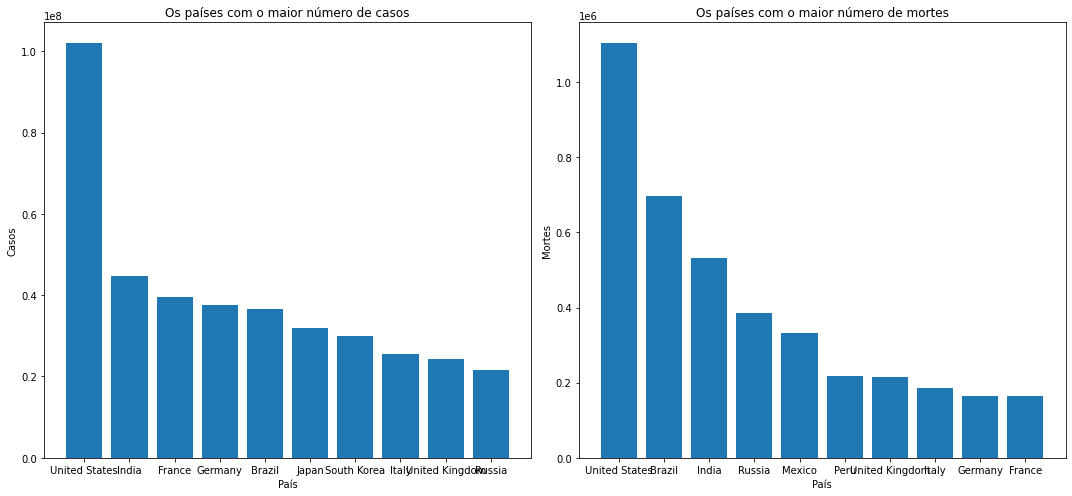

In [ ]:
top_10_cases = df_cnt[df_cnt.date == current_date].sort_values(by="total_cases", ascending=False)[["location","total_cases"]][0:10]
top_10_deaths = df_cnt[df_cnt.date == current_date].sort_values(by="total_deaths", ascending=False)[["location","total_deaths"]][0:10]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

ax1.set_title('Os países com o maior número de casos')
ax1.set_xlabel('País')
ax1.set_ylabel('Casos')
ax1.bar('location', 'total_cases', data=top_10_cases)

ax2.set_title('Os países com o maior número de mortes')
ax2.set_xlabel('País')
ax2.set_ylabel('Mortes')
ax2.bar('location', 'total_deaths', data=top_10_deaths)

plt.tight_layout()

## Gráfico da evolução do número de casos e de mortes para os países mais afetados pela pandemia
### Gráfico de novos casos

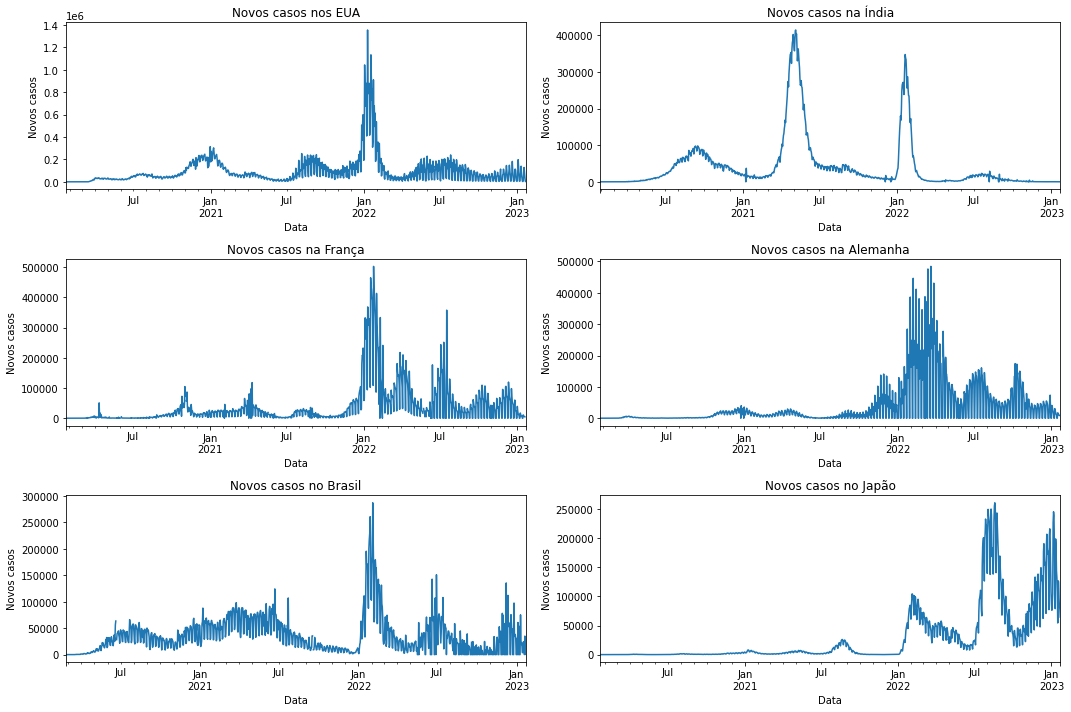

In [ ]:
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
new_cases_usa = df.loc[df.iso_code == "USA",["date","new_cases"]].set_index("date")
new_cases_usa["new_cases"].plot(kind='line', ax=ax1)
ax1.set_title('Novos casos nos EUA')
ax1.set_xlabel('Data')
ax1.set_ylabel('Novos casos')

new_cases_india = df.loc[df.iso_code == "IND",["date","new_cases"]].set_index("date")
new_cases_india["new_cases"].plot(kind='line', ax=ax2)
ax2.set_title('Novos casos na Índia')
ax2.set_xlabel('Data')
ax2.set_ylabel('Novos casos')

new_cases_france = df.loc[df.iso_code == "FRA",["date","new_cases"]].set_index("date")
new_cases_france["new_cases"].plot(kind='line', ax=ax3)
ax3.set_title('Novos casos na França')
ax3.set_xlabel('Data')
ax3.set_ylabel('Novos casos')

new_cases_germany = df.loc[df.iso_code == "DEU",["date","new_cases"]].set_index("date")
new_cases_germany["new_cases"].plot(kind='line', ax=ax4)
ax4.set_title('Novos casos na Alemanha')
ax4.set_xlabel('Data')
ax4.set_ylabel('Novos casos')


new_cases_brazil = df.loc[df.iso_code == "BRA",["date","new_cases"]].set_index("date")
new_cases_brazil["new_cases"].plot(kind='line', ax=ax5)
ax5.set_title('Novos casos no Brasil')
ax5.set_xlabel('Data')
ax5.set_ylabel('Novos casos')


new_cases_japan = df.loc[df.iso_code == "JPN",["date","new_cases"]].set_index("date")
new_cases_japan["new_cases"].plot(kind='line', ax=ax6)
ax6.set_title('Novos casos no Japão')
ax6.set_xlabel('Data')
ax6.set_ylabel('Novos casos')


plt.tight_layout()

### Gráfico de novas mortes
Embora Japão e Alemanha não estejam liderando o quadro de mortes, decidi inclui-los, pois estão com alto número de novas mortes 

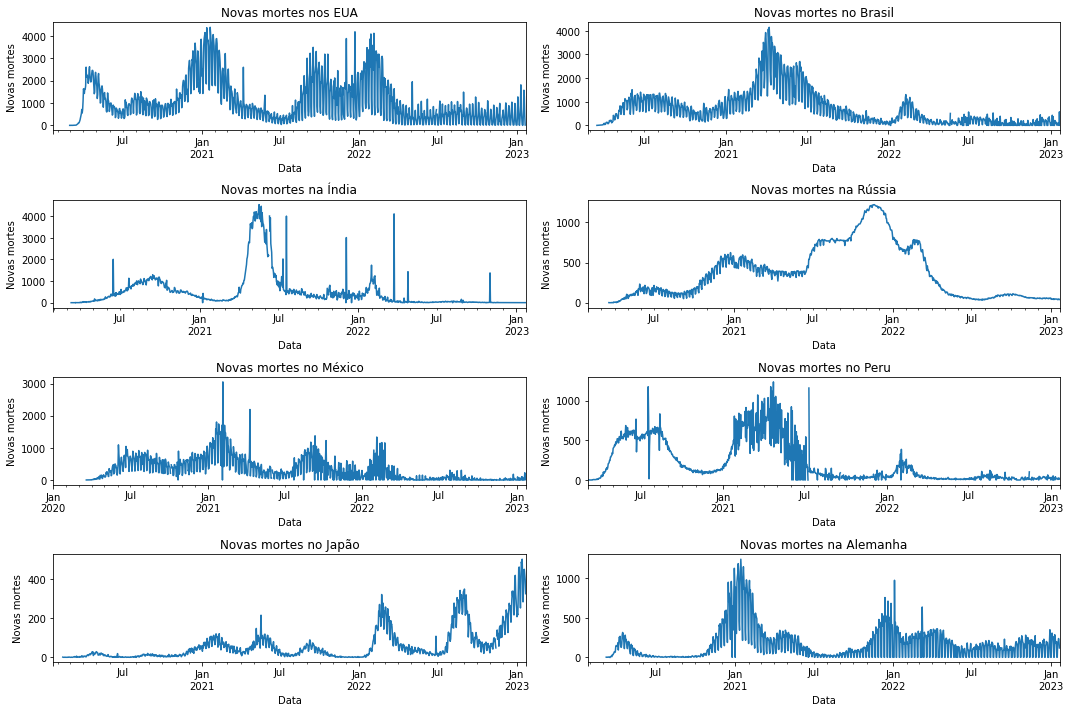

In [ ]:
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))
new_deaths_usa = df.loc[df.iso_code == "USA",["date","new_deaths"]].set_index("date")
new_deaths_usa["new_deaths"].plot(kind='line', ax=ax1)
ax1.set_title('Novas mortes nos EUA')
ax1.set_xlabel('Data')
ax1.set_ylabel('Novas mortes')

new_deaths_brazil = df.loc[df.iso_code == "BRA",["date","new_deaths"]].set_index("date")
new_deaths_brazil["new_deaths"].plot(kind='line', ax=ax2)
ax2.set_title('Novas mortes no Brasil')
ax2.set_xlabel('Data')
ax2.set_ylabel('Novas mortes')

new_deaths_india = df.loc[df.iso_code == "IND",["date","new_deaths"]].set_index("date")
new_deaths_india["new_deaths"].plot(kind='line', ax=ax3)
ax3.set_title('Novas mortes na Índia')
ax3.set_xlabel('Data')
ax3.set_ylabel('Novas mortes')

new_deaths_russia = df.loc[df.iso_code == "RUS",["date","new_deaths"]].set_index("date")
new_deaths_russia["new_deaths"].plot(kind='line', ax=ax4)
ax4.set_title('Novas mortes na Rússia')
ax4.set_xlabel('Data')
ax4.set_ylabel('Novas mortes')

new_deaths_mexico = df.loc[df.iso_code == "MEX",["date","new_deaths"]].set_index("date")
new_deaths_mexico["new_deaths"].plot(kind='line', ax=ax5)
ax5.set_title('Novas mortes no México')
ax5.set_xlabel('Data')
ax5.set_ylabel('Novas mortes')

new_deaths_peru = df.loc[df.iso_code == "PER",["date","new_deaths"]].set_index("date")
new_deaths_peru["new_deaths"].plot(kind='line', ax=ax6)
ax6.set_title('Novas mortes no Peru')
ax6.set_xlabel('Data')
ax6.set_ylabel('Novas mortes')

new_deaths_japan = df.loc[df.iso_code == "JPN",["date","new_deaths"]].set_index("date")
new_deaths_japan["new_deaths"].plot(kind='line', ax=ax7)
ax7.set_title('Novas mortes no Japão')
ax7.set_xlabel('Data')
ax7.set_ylabel('Novas mortes')

new_deaths_germany = df.loc[df.iso_code == "DEU",["date","new_deaths"]].set_index("date")
new_deaths_germany["new_deaths"].plot(kind='line', ax=ax8)
ax8.set_title('Novas mortes na Alemanha')
ax8.set_xlabel('Data')
ax8.set_ylabel('Novas mortes')

plt.tight_layout()

Pelos gráficos acima, verifica-se que o Japão está com um pico de novos casos e de mortes, e ainda apresenta tendência de crescimento. Vale a pena ressaltar, que o Japão, numa tendência contrária à maioria dos países do globo não sofreu tanto com as duas primeiras ondas de coronvavírus. Estados Unidos e Alemanha estão com um número relativamente alto e constante de mortes, embora não tanto quando nas duas primeiras ondas de COVID, com ligeria tendência de alta para os EUA e uma ligeira tendência de baixa para a Alemanha. Os demais países, estão com um número baixo de mortes, porém constante.

### A situação vacinal no mundo
Vamos fazer uma breve análise dos países quanto à cobertura vacinal. Primeiramente mostraremos um gráfico da proporção de pessoas vacinadas no mundo todo e a seguir um ranking com os países com a maior proporção de indivíduos vacinados.  
Proporção de indivíduos vacinados com ao menos uma dose e proporção de indivíduos completamente vacinados

In [ ]:
#instalar o pywaffle
!pip install pywaffle -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 40.2 MB/s eta 0:00:00


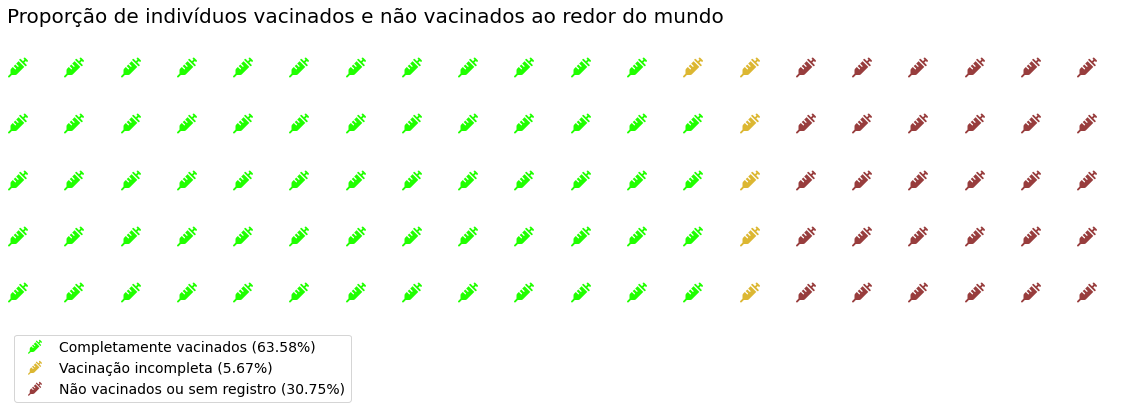

In [ ]:
from pywaffle import Waffle
df_vaccine = df_grp.loc[ (df_grp.iso_code == "OWID_WRL") & (df_grp.date == current_date),["date","people_vaccinated_per_hundred","people_fully_vaccinated_per_hundred"]].set_index("date")
data = {
    "Completamente vacinados": df_vaccine.loc[current_date].people_fully_vaccinated_per_hundred,
    "Vacinação incompleta": df_vaccine.loc[current_date].people_vaccinated_per_hundred - df_vaccine.loc[current_date].people_fully_vaccinated_per_hundred,
    "Não vacinados ou sem registro": 100.0 - df_vaccine.loc[current_date].people_vaccinated_per_hundred
}
fig = plt.figure(
                title={
                    'label': 'Proporção de indivíduos vacinados e não vacinados ao redor do mundo',
                    'loc': 'left',
                            'fontdict': {
                                'fontsize': 20
                            }
                },
                FigureClass=Waffle,
                rows=5,
                columns=20,
                colors=("#20FF00", "#DCB732", "#983D3D"),
                values=data, icons='syringe', icon_size=20,
                legend={'loc': 'lower left', 
                        'bbox_to_anchor': (0,-0.4),
                        'fontsize':14},
                labels=[f"{k} ({(v / sum(data.values()) * 100):.2f}%)" for k, v in data.items()], 
                icon_legend=True,
                figsize=(20,10)
                )
fig.set_tight_layout(False)
plt.show();


Ranking dos países com maior proporção de indivíduos vacinados


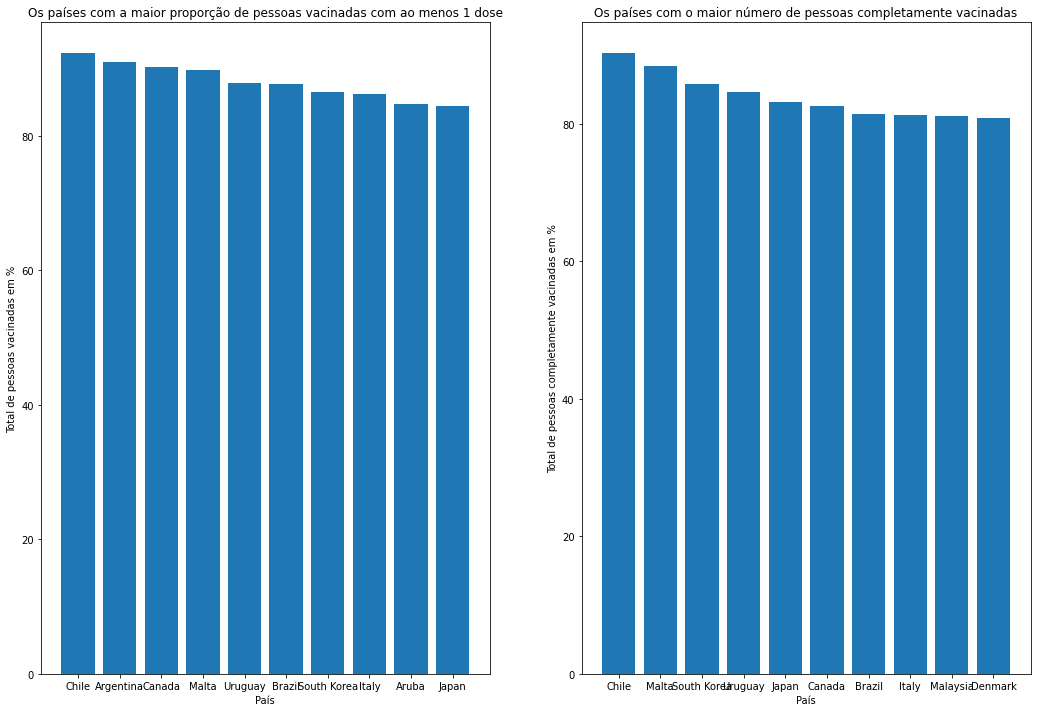

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1,figsize=(15,10))
at_least_one_dose = df_cnt.loc[df.date==current_date].sort_values(by="people_vaccinated_per_hundred", ascending=False)[0:10]
fully_vaccinated = df_cnt.loc[df.date==current_date].sort_values(by="people_fully_vaccinated_per_hundred", ascending=False)[0:10]

ax1.set_title('Os países com a maior proporção de pessoas vacinadas com ao menos 1 dose')
ax1.set_xlabel('País')
ax1.set_ylabel('Total de pessoas vacinadas em %')
ax1.bar('location', 'people_vaccinated_per_hundred', data=at_least_one_dose)

ax2.set_title('Os países com o maior número de pessoas completamente vacinadas')
ax2.set_xlabel('País')
ax2.set_ylabel('Total de pessoas completamente vacinadas em %')
ax2.bar('location', 'people_fully_vaccinated_per_hundred', data=fully_vaccinated)

plt.tight_layout()

Interessante notar que  Japão e Coreia do Sul, mesmo estando entre os países que mais vacinaram suas populações estão tendo uma alta no múmero de casos. Sem querer entrar em polêmica, pode se questionar se as vacinas estão contribuindo ou não o enfraquecimento da pandemia. Há quem diga que as vacinas estão atrapalhando pois estariam fazendo com que surjam mais variantes do vírus da COVID-19.

## Análise Exploratória para o Brasil

Agora vamos concentrar nossa atenção na análise da evolução da doença no Brasil.
Primeiramente vamos encontrar as datas do primeiro caso, da primeira morte e o intervalo entre estas duas datas:

In [ ]:
#Pegando somente os dados do Brasil
df_brasil = df_cnt.loc[df.iso_code == "BRA"]
# Verificando quando ocorreu o primeiro caso no Brasil
df_brasil[df_brasil.new_cases != 0.0].head(1)
#type(date_first_case.date)
#print("O primeiro caso de COVID-19 no Brasil foi em {}\n".format(date_first_case.date))

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
30671,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN


In [ ]:
# Verificando quando ocorreu a primeiro morte por COVID-19 no Brasil
df_brasil[df_brasil.new_deaths > 0.0].head(1)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
30691,BRA,South America,Brazil,2020-03-17,321.0,121.0,41.429,1.0,1.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN


In [ ]:
from datetime import date

position_first_case = 30671
position_first_death = 30691
print("O primeiro caso de COVID-19 no Brasil foi em {}.".format(df_brasil.loc[position_first_case].date.strftime("%Y-%m-%d")))
print("A primeira morte por COVID-19 no Brasil foi em {}.".format(df_brasil.loc[position_first_death].date.strftime("%Y-%m-%d")))
delta = df_brasil.date.loc[position_first_death] - df_brasil.date.loc[position_first_case]

print("O intervalo entre o primeiro caso e a primeira morte foi de {} dias.".format(delta.days))

O primeiro caso de COVID-19 no Brasil foi em 2020-02-26.
A primeira morte por COVID-19 no Brasil foi em 2020-03-17.
O intervalo entre o primeiro caso e a primeira morte foi de 20 dias.


### Plotando gráficos do total de casos e de mortes ao longo do tempo (escalas normal e logarítmica)

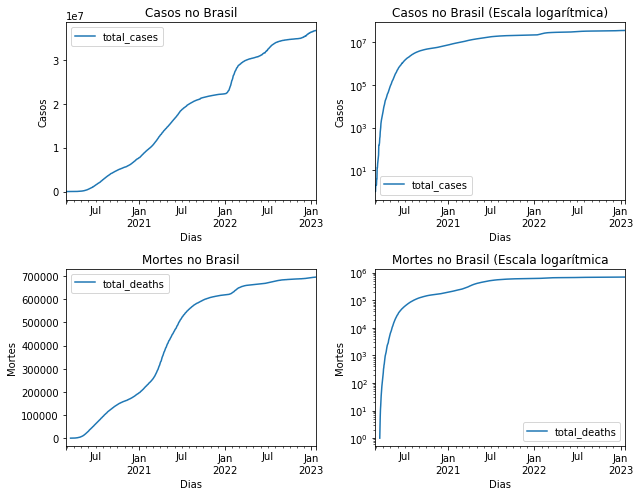

In [ ]:
cases_brasil = df_brasil[["date","total_cases"]].set_index("date")
deaths_brasil = df_brasil[["date","total_deaths"]].set_index("date")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(9, 7))

cases_brasil.plot(kind='line', ax=ax1)
ax1.set_title('Casos no Brasil')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.legend()

cases_brasil.plot(kind='line', ax=ax2)
ax2.set_title('Casos no Brasil (Escala logarítmica)')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.set_yscale('log')

deaths_brasil.plot(kind='line', ax=ax3)
ax3.set_title('Mortes no Brasil')
ax3.set_xlabel('Dias')
ax3.set_ylabel('Mortes')

deaths_brasil.plot(kind='line', ax=ax4)
ax4.set_title('Mortes no Brasil (Escala logarítmica')
ax4.set_xlabel('Dias')
ax4.set_ylabel('Mortes')
ax4.set_yscale('log')

plt.tight_layout()

### A cobertura vacinal no Brasil
A seguir um infográfico do total de indivíduos completamente vacinados, com ao menos uma dose e os não vacinados ou sem registro de vacina, mostrando somente os registros do Brasil.

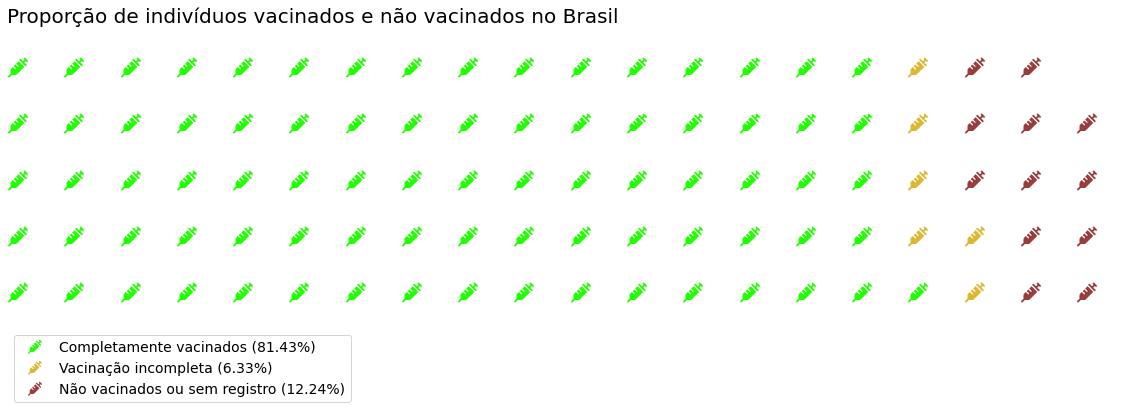

In [ ]:
#from pywaffle import Waffle
current_date = "2023-01-22"
df_vaccine_br = df_brasil.loc[df_cnt.date == current_date,
                        ["date","people_vaccinated_per_hundred","people_fully_vaccinated_per_hundred"]].set_index("date")
data = {
    "Completamente vacinados": df_vaccine_br.loc[current_date].people_fully_vaccinated_per_hundred,
    "Vacinação incompleta": df_vaccine_br.loc[current_date].people_vaccinated_per_hundred - df_vaccine_br.loc[current_date].people_fully_vaccinated_per_hundred,
    "Não vacinados ou sem registro": 100.0 - df_vaccine_br.loc[current_date].people_vaccinated_per_hundred
}

fig = plt.figure(
                title={
                    'label': 'Proporção de indivíduos vacinados e não vacinados no Brasil',
                    'loc': 'left',
                            'fontdict': {
                                'fontsize': 20
                            }
                },
                FigureClass=Waffle,
                rows=5,
                columns=20,
                colors=("#20FF00", "#DCB732", "#983D3D"),
                values=data, icons='syringe', icon_size=20,
                legend={'loc': 'lower left', 
                        'bbox_to_anchor': (0,-0.4),
                        'fontsize':14},
                labels=[f"{k} ({(v / sum(data.values()) * 100):.2f}%)" for k, v in data.items()], 
                icon_legend=True,
                figsize=(20,10)
                )
fig.set_tight_layout(False)
plt.show();



## Conclusão
Lembrando-se que esta é uma análise breve e que pode ficar desatualizada rapidamente, especialmente quanto aos rankings de novos casos e de novas mortes, que variam diariamente. Às vezes, acontece de um país passar vários dias sem atualização de novos casos e novas mortes e a seguir, em um único dia haver lançamento de dados represados de vários dias anteriores ao lançamento, podendo gerar uma distorção na percepção da situação atual do país quanto à evolução da doença.  
Apesar das dificuldades citadas acima, podemos concluir que:
*  Estados Unidos, Índia e Brasil são os países com mais mortes por COVID-19 no mundo inteiro. De um modo geral, o número de casos está relaciodo com o número de mortes. Há algumas exceções, por exemplo, a Coreía do Sul, que está entre os 10 países com mais casos, porém não está entre os países com maior número de mortes. O México, por sua vez, é o 5º país com mais mortes, poré não está entre o países com mais casos;
* De um modo geral, a segunda onda de coronavírus, que acometeu a maioria dos países no começo de 2021, foi a mais grave, com o número de mortes bem maior que na primeira onda. Houve uma terceira onda, no começo de 2022, com um número de casos bem maior que nas duas primeiras ondas, porém com um número de mortes menor.    
* Alguns países asiáticos, como Japão, Coreia do Sul e Hong-Kong, que não sofreram tanto nas 2 primeiras ondas de coronavírus estão atualmente apresentando uma alta no número de casos e de mortes. É um sinal de que populações diferentes têm reações diferentes frente às mutações do vírus;  
* O Brasil, durante a primeira onda de COVID, apresentou um comportamento ligeramente diferente da maioria dos países do globo, que atingiram um pico de mortes e logo depois começaram a cair. No Brasil, o número de mortes atingiu um pico, de cerca de 1000 mortes diárias por volta do começo de junho de 2020 e permanceu estável até outubro daquele ano e só aí começou a cair. Isso se explica pelo fato de que o Brasil é um país de dimensões continentais e algumas regioões demoraram mais para registrar os primeiros casos de coronavírus e assim, as diversas regiões brasileiras atingiram o pico do número de mortes em momentos diferentes. No período em que o número de mortes estava estável, alguns locais já apresentavam queda e outros ainda estavam subindo;  
* Ainda sobre o Brasil, no momento atual o país está tendo um número baixo de novos casos e mortes, se comparado às 3 primeiras ondas da COVID-19, porém este número se mantém constante. Isso parece ser um indício de que a doença, confome já foi dito por alguns especialistas, está passando a ter um caráter endêmico, em vez de epidêmico. Em outras palavras, ela não vai desaparer, mas vai se manter em níveis mais baixos;  
* As vacinas parecem ter tido um impacto positivo pelo menos redução da gravidade dos sintomas de COVID, porém não estão reduzindo o número de casos, tanto que muitas pessoas vacinadas ainda são infectadas e transmitem o vírus. Países com grande proporção de indivíduos vacinados, como Japão e Coreia do Sul, estão no momento, com alta no número de casos e de mortes.